**Proceso a Seguir**


1.   Carga de Data
2.   Pre Procesamiento de Datos
3.   Analisis de Data
4.   Separación de Datos de Entrenamiento y Prueba.
5.   Construcción del Modelo
6.   Evaluación del Modelo




PassengerId: An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.

Survived: Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

Pclass: Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

Name: Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

Sex: Passenger's sex. It's either Male or Female.

Age: Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

SibSp: Number of siblings or spouses travelling with each passenger.

Parch: Number of parents of children travelling with each passenger.
Ticket: Ticket number.
Fare: How much money the passenger has paid for the travel journey.
Cabin: Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.
Embarked: Port from where the particular passenger was embarked/boarded.

In [1]:
#Importar dependencias necesarias  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#Carga de data
# load the data from csv file to Pandas DataFrame
td = pd.read_csv('train.csv')

In [3]:
# Pre Procesamiento de Data 
#printing the first 5 rows of the dataframe
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# number of rows and Columns
td.shape

(891, 12)

In [5]:
#Revisar datos nulos en cada columna  
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Se elimina Columnas que no aportan mucha información al analisis
td = td.drop(columns=['Cabin','PassengerId','Name','Ticket'], axis=1)

In [7]:
#Se erevisa el cambio hecho
td.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
#Se saca la media de edad
td['Age'].mean()

29.69911764705882

In [9]:
# Se reemplaza las 177 edades con la media 
td['Age'].fillna(td['Age'].mean(), inplace=True)

In [10]:
#Se encuentra la moda de Embarked
td['Embarked'].mode()

0    S
dtype: object

In [11]:
# Se reemplaza en los dos espacios vacios
td['Embarked'].fillna(td['Embarked'].mode()[0], inplace=True)

In [12]:
# Se verifica que no haya espacios vacios
td.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
# Analisis de Data
#Se obtiene algunos datos estadisticos de Data
td.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


0    549
1    342
Name: Survived, dtype: int64

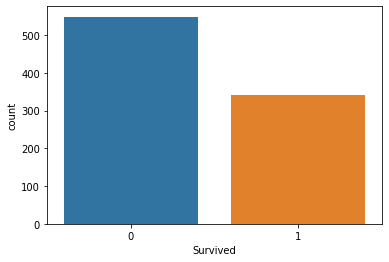

In [14]:
# Grafico de Supervivencia
sns.countplot(x='Survived', data=td)
td['Survived'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

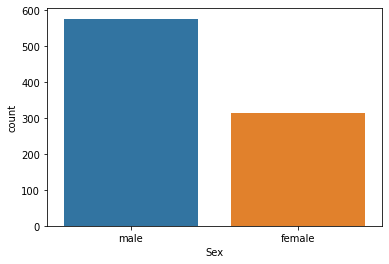

In [15]:
#Conteo de personas por sexo
sns.countplot(x='Sex', data=td)
td['Sex'].value_counts()

<AxesSubplot:xlabel='Sex', ylabel='count'>

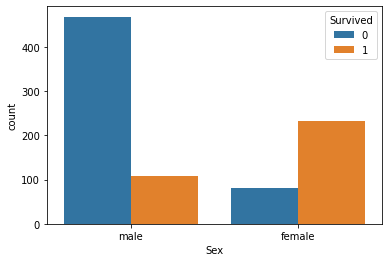

In [16]:
#Numero de sobrevivientes por genero
sns.countplot(x='Sex', hue='Survived', data=td)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

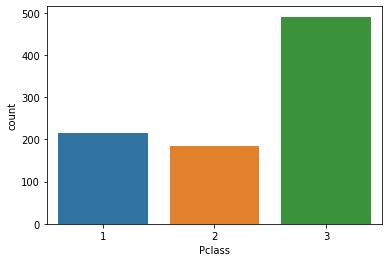

In [17]:
#Diferenciación por Clase
sns.countplot(x='Pclass', data=td)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

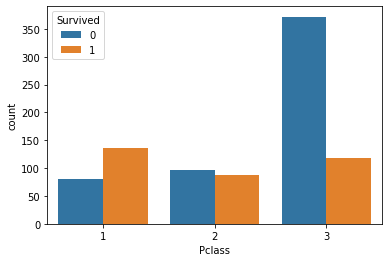

In [18]:
#Diferenciación de sobrevivencia por clase
#Passenger ticket class where 1 = First class, 2 = Second class, 3 = Third class
sns.countplot(x='Pclass', hue='Survived', data=td)

In [19]:
# Convirtiendo las variables categoricas en numericas
#Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton
print(td['Sex'].value_counts())
print(td['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [20]:
td.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [21]:
td.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [22]:
#Categorizando y eliminando columnas que no apo
Y=td['Survived']
td = td.drop(columns = 'Survived', axis=1)
td.head()
X=td


In [23]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [24]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [25]:
#Splitting the data into training data & Test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape,Y_train.shape,Y_test.shape)

(891, 7) (712, 7) (179, 7) (712,) (179,)


In [27]:
# Se usará regresión logistica
model = LogisticRegression()

In [28]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [29]:
#Evaluación del Modelo
#Precisión del modelo
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)


Accuracy score of training data :  0.8075842696629213


In [30]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7821229050279329


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f35350a5-8ccb-489a-a442-769d80a9f564' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>